**Purpose**

The purpose of this analysis is to analyze YouTube comments using a VADER sentiment analysis to establish the general view on coronavirus vaccines when the vaccines were released in December 2020.

First we shall import pandas and SentimentIntensityAnalyzer and warnings.

In [68]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

Now we'll open the data file and determine its keys.

In [69]:
oly_uniq = pd.read_csv(r"C:\Users\Dave\Dropbox\College\Data in Emerging Media and Technologies\YouTubeVaccination_Dec14-Dec26_2021_fixed.csv")
oly_uniq.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

In [70]:
oly_uniq['Language'].head(20)

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    en
18    en
19    en
Name: Language, dtype: object

Next, we'll filter for only comments in English.

In [71]:
en_only = oly_uniq.loc[oly_uniq['Language'] == 'en']
en_only

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT
12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT
12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT
12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT


In [72]:
en_only['Date']

0        12/26/2020 23:56
1        12/26/2020 23:36
2        12/26/2020 23:34
3        12/26/2020 23:30
4        12/26/2020 23:27
               ...       
12486     12/13/2020 0:12
12487     12/13/2020 0:11
12488     12/13/2020 0:07
12489     12/13/2020 0:02
12490     12/13/2020 0:01
Name: Date, Length: 12491, dtype: object

In [73]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [74]:
print(en_only['Full Text'][3])
print(analyser.polarity_scores(en_only['Full Text'][3]))

@Sweet Heart Well, Quantas, an Australian airline, has already made it that no one can fly with them unless they have a stamp on their passport showing that they got the vaccine. What will be next? Maybe a tattoo on your hand. Look, China is already doing this with their citizens, controlling all their moves. You do something wrong, you get a strike, meaning that you won't be allowed in a supermarket, or public places, or in an airport. The vaccine is just one step to get there where they (the U.N. and their 2030 agenda....look it up) want you.
{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'compound': 0.7906}


This next line displays the VADER analysis for the first twenty comments.

In [75]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...
3     {'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...
4     {'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...
5     {'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...
6     {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
8     {'neg': 0.036, 'neu': 0.811, 'pos': 0.154, 'co...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.047, 'neu': 0.886, 'pos': 0.067, 'co...
11    {'neg': 0.246, 'neu': 0.719, 'pos': 0.035, 'co...
12    {'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'co...
13    {'neg': 0.135, 'neu': 0.778, 'pos': 0.087, 'co...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...
16    {'neg': 0.134, 'neu': 0.841, 'pos': 0.025, 'co...
17    {'neg': 0.064, 'neu': 0.638, 'pos': 0.298,

In [76]:
en_only['vader_scores'][2]['pos']

0.196

In [77]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0        0.000
1        0.000
2        0.196
3        0.123
4        0.103
         ...  
12486    0.127
12487    0.131
12488    0.178
12489    0.000
12490    0.000
Name: pos, Length: 12491, dtype: float64

We can now import matplotlib and pyplot to visualize the data.

In [78]:
from matplotlib import pyplot as plt

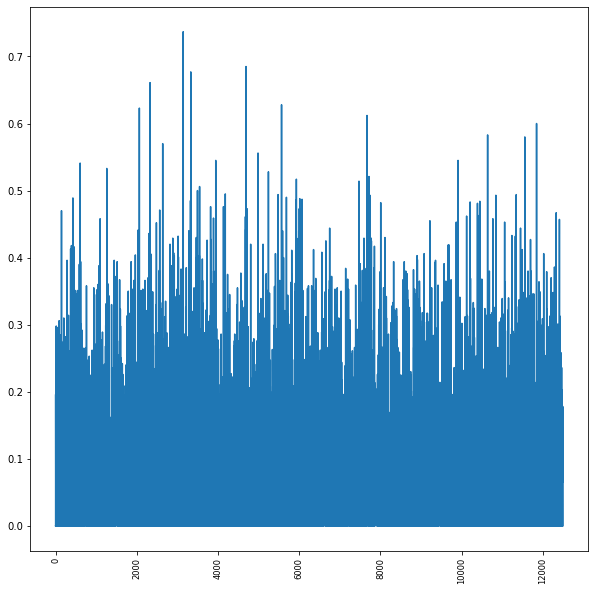

In [79]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [80]:
type(en_only['Date'][0])

str

In [81]:
from datetime import datetime as dt

In [82]:
en_only['Datetime'] = [dt.strptime(x, '%m/%d/%Y %H:%M') for x in en_only['Date']]
print(type(en_only['Datetime'][0]))
print(en_only['Datetime'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-12-26 23:56:00


Let's plot the raw data on a scatterplot.

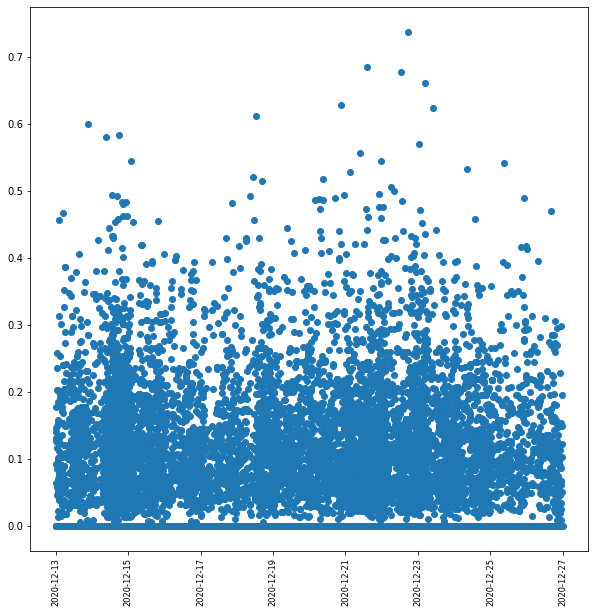

In [83]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(en_only['Datetime'], en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

According to the scatterplot, all of the data is either neutral or in some way positive. (Not very positive, but it's above 0.) This leads us to believe that in general the public had a neutral to positive outlook on the vaccines.

In [84]:
pre_announce = en_only.loc[en_only['Datetime'] < '2020-12-14 00:00:00.0'].reset_index()
pre_announce

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type,vader_scores,pos,Datetime
0,11788,12/13/2020 23:59,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=fEWygU_qRCQlc=...,youtube.com,youtube,en,Heidi Hi,NaN,@Stephen Jones Vaccines cause polio to return ...,https://www.youtube.com/watch?v=fEWygU_qRCQlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 23:59:00
1,11789,12/13/2020 23:57,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Pam K,NaN,@GizmoFN LMAO. You're a real idiot. You know n...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.377, 'neu': 0.518, 'pos': 0.104, 'co...",0.104,2020-12-13 23:57:00
2,11790,12/13/2020 23:51,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=BTMqm-pn...,youtube.com,youtube,en,Tim Petrillo,NaN,The vaccine will be way more harmful than the ...,http://www.youtube.com/all_comments?v=BTMqm-pn...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 23:51:00
3,11791,12/13/2020 23:51,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=BTMqm-pn7f0lc=...,youtube.com,youtube,en,Tim Petrillo,NaN,The vaccine will be way more harmful than the ...,https://www.youtube.com/watch?v=BTMqm-pn7f0lc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 23:51:00
4,11792,12/13/2020 23:45,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,H.S. Darke,NaN,@Golden Serenity I'll do you one better. The i...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...",0.097,2020-12-13 23:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT,"{'neg': 0.229, 'neu': 0.644, 'pos': 0.127, 'co...",0.127,2020-12-13 00:12:00
699,12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...",0.131,2020-12-13 00:11:00
700,12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT,"{'neg': 0.271, 'neu': 0.551, 'pos': 0.178, 'co...",0.178,2020-12-13 00:07:00
701,12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 00:02:00


In [85]:
post_announce = en_only.loc[en_only['Datetime'] > '2020-12-26 00:00:00.0'].reset_index()
post_announce

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type,vader_scores,pos,Datetime
0,0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 23:56:00
1,1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 23:36:00
2,2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...",0.196,2020-12-26 23:34:00
3,3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...",0.123,2020-12-26 23:30:00
4,4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT,"{'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...",0.103,2020-12-26 23:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,12/26/2020 0:14,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=O-vWK06seD8lc=...,youtube.com,youtube,en,Chauncey Sullivan,Chauncey Sullivan,Nobody wants this vaccine so they gonna try to...,https://www.youtube.com/watch?v=O-vWK06seD8lc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 00:14:00
377,377,12/26/2020 0:13,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=xGkwu3TxuoElc=...,youtube.com,youtube,en,Hagfish,NaN,A 0 tested vaccine ðŸ¤ª no thanks,https://www.youtube.com/watch?v=xGkwu3TxuoElc=...,reply,YouTube,VCOMMENT,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.000,2020-12-26 00:13:00
378,378,12/26/2020 0:12,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=ROadt_VB9EAlc=...,youtube.com,youtube,en,Holly Chapman-Burden,Holly Chapman-Burden,Iâ€™m grateful that my grandparents got the va...,https://www.youtube.com/watch?v=ROadt_VB9EAlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.244,2020-12-26 00:12:00
379,379,12/26/2020 0:09,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dtRJ8hFZTpwlc=...,youtube.com,youtube,en,rftckip,rftckip,Just got his covid vaccine,https://www.youtube.com/watch?v=dtRJ8hFZTpwlc=...,reply,YouTube,VCOMMENT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 00:09:00


In [86]:
from scipy import stats

In [87]:
stats.describe(pre_announce['pos']).mean

0.08608392603129444

In [88]:
stats.describe(post_announce['pos']).mean

0.08325196850393701

In [89]:
stats.ttest_ind(pre_announce['pos'], post_announce['pos'])

Ttest_indResult(statistic=0.4985466434148238, pvalue=0.6182001301394788)

In terms of limitations, this dataset could be larger. More data would suffice to obtain a larger sample size and therefore a better analysis of the general opinion. 

**Conclusion**

In conclusion, based on the data provided, we can conclude the public had a positive outlook on the vaccines.